# <h1><center>**CONCEPTOS BÁSICOS REDES NEURONALES**</center></h1>

In [3]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import math

C:\Users\atgru\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EJEMPLO EQUIVALENCIA CELSIUS/FAHRENHEIT

+ Importar datos

In [4]:
# Creamos dos matrices de datos
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)


+ Creación de capas

En este caso, vamos a crear una red neuronal de capas densas.

Una capa densa son las que conectan cada neurona de su capa con cada neurona de la capa siguiente. La red neuronal que vamos a crear se vería como se muestra a continuación:


<img src="RN_CtoF.jpg" width=700 height=600 />

In [5]:
# Creamos una red neuronal densa de dos neuronas
    # Capa Nº1 (azul en imagen)
oculta1 = tfk.layers.Dense(units=3, input_shape=[1])
        # Esta capa tiene una entrada con una neurona (input_shape=[1]) y 3 neuronas (units=3)

    # Capa Nº2 (rojo en imagen)
oculta2 = tfk.layers.Dense(units=3)
        # Esta capa tiene 3 neuronas (units=3)

    # Capa de Salida (verde en imagen)
salida = tfk.layers.Dense(units=1)
        # Esta capa tiene 1 neurona (units=1)



+ Creación de modelo

Para este caso, vamos a usar un modelo secuencial.

In [6]:
modelo = tfk.Sequential([oculta1, oculta2, salida])

+ Ajuste de propiedades del modelo

In [7]:
# Ajustamos el optimizador y la función de pérdidas del modelo
modelo.compile(
    optimizer = tfk.optimizers.Adam(0.1),       # El optimizador le permite al modelo ajustar bien los sesgos y pesos de manera eficiente
    loss= "mean_squared_error"                  # Función de pérdidas
)

+ Entrenamiento del modelo

In [8]:

print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=100, verbose=False)
    # Datos de entrada, resultados, iteraciones de datos, no escribir nada en consola
        # Las iteraciones de datos son las veces que revisa los datos de entrada y salida.
print("Modelo entrenado!!")


Comenzando entrenamiento...
Modelo entrenado!!


+ Función de pérdidas

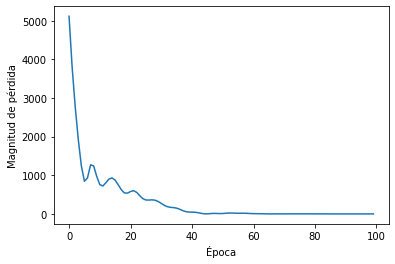

In [9]:
# Mostramos la función de pérdidas
plt.plot(historial.history["loss"])
plt.xlabel("Época");
plt.ylabel("Magnitud de pérdida");

In [12]:
# Le damos un dato para que haga una predicción
print("Hagamos una predicción:")
dato = 100
resultado = modelo.predict([dato])
resultado = "{:.2f}".format(resultado[0][0])
print("- Según tus pocas neuronas, " + f'{dato}' + "ºC equivalen a " + f'{resultado}' + "ºF")

Hagamos una predicción:
1/1 [==============================] - 0s 109ms/step
- Según tus pocas neuronas, 100ºC equivalen a 211.60ºF


+ Visualización de variables internas

In [20]:
# Visualizamos las variables internas de la primera capa
print("Variables internas del modelo")
print(oculta1.get_weights())

Variables internas del modelo
[array([[-0.07103866,  0.7935287 , -0.09182416]], dtype=float32), array([4.081635 , 5.244261 , 3.9274187], dtype=float32)]


## EJEMPLO DE CLASIFICACIÓN DE ROPA

In [21]:
datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)

In [22]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='C:\\Users\\atgru\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han

In [23]:
# Hacemos una copia de los datos para hacer pruebas
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

In [24]:
nombre_clases = metadatos.features["label"].names
print(nombre_clases)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [25]:
# Normalizar de 0 a 1 los datos de 0 a 255

def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes/= 255
    return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [26]:
# Agregamos los datos a caché para una lectura más rápida
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

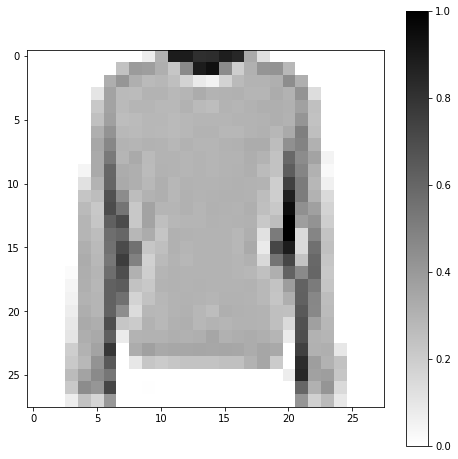

In [27]:
# Mostrar imágenes de los datos de prueba
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28))
plt.rcParams["figure.figsize"] = (8, 8)

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.figure.figsize = (4,4)
plt.show()

    

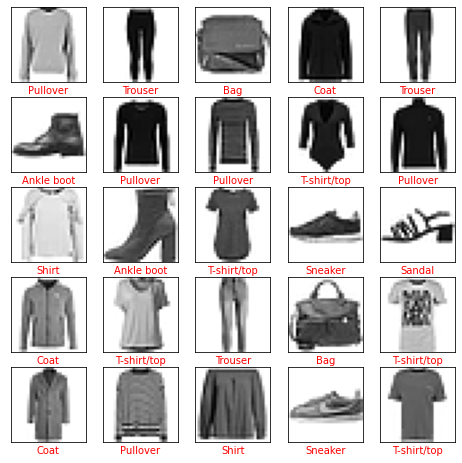

In [28]:
# Mostrar imágenes de los datos de prueba
plt.rcParams["figure.figsize"] = (8, 8)
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombre_clases[etiqueta]).set_color("red")


plt.show()

In [29]:
modelo = tfk.Sequential([
    tfk.layers.Flatten(input_shape=(28,28,1)),
    tfk.layers.Dense(50, activation=tf.nn.relu),
    tfk.layers.Dense(50, activation=tf.nn.relu),
    tfk.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [30]:
modelo.compile(
    optimizer="adam",
    loss = tfk.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [31]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [32]:
TAMAÑO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMAÑO_LOTE)

In [33]:
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMAÑO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.5122 - accuracy: 0.8191
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3844 - accuracy: 0.8610
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3440 - accuracy: 0.8738
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3260 - accuracy: 0.8803
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3111 - accuracy: 0.8845


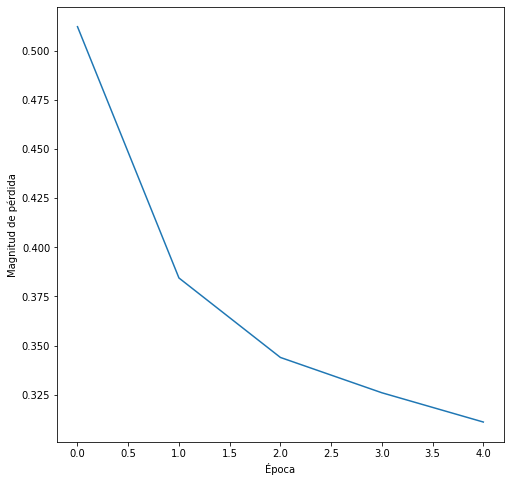

In [34]:
# Mostramos la función de pérdidas
plt.rcParams["figure.figsize"] = (8, 8)
plt.plot(historial.history["loss"])
plt.xlabel("Época");
plt.ylabel("Magnitud de pérdida");